# Projeto Analise Exploratória de Dados - Python

## Grupo:
Thais Saori Yoshidome Vieira<br>
Vanessa Lazarin de Souza<br>
Daniel Ribeiro Gulgielmin<br>
Giuliano C Oliveira

### <b>Grupo analisando duas fontes de dados distintas antes de decidir qual prosseguir.</b>

# Fonte de Dados # 1 - Agência Nacional de Petróleo - Brasil - Base Histórica de Preços de Combustíveis
Fonte de dados utilizada: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

Metadados: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/metadados-serie-historica-precos-combustiveis-1.pdf

Alternativa encontrada no Kaggle: https://www.kaggle.com/datasets/paulogladson/anp-combustveis/data

In [2]:
## Inserir aqui a lista de todas as bibliotecas necessárias para manipulação dos dados

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Read file using pandas

df1 = pd.read_csv('arquivos/Preços semestrais - AUTOMOTIVOS_2023.01.csv', sep=';')
df2 = pd.read_csv('arquivos/ca-2022-02.csv', sep=';')
df3 = pd.read_csv('arquivos/precos-semestrais-ca-2022-01.csv', sep=';')

df = pd.concat([df1, df2, df3], ignore_index=True, sort=False)
df = df.set_axis(['REGIAO', 'ESTADO', 'MUNICIPIO', 'REVENDA', 'CNPJ', 'RUA', 'NUMERO', 'COMPLEMENTO', 'BAIRRO', 'CEP', 'PRODUTO', 'COLETA', 'VENDA', 'COMPRA', 'UNIDADE', 'BANDEIRA'], axis =1)


In [4]:
df['VENDA'] = df['VENDA'].replace(',','.', regex=True).astype(float)
display(df)

,REGIAO,ESTADO,MUNICIPIO,REVENDA,CNPJ,RUA,NUMERO,COMPLEMENTO,BAIRRO,CEP,PRODUTO,COLETA,VENDA,COMPRA,UNIDADE,BANDEIRA
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/01/2023,3.39,NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL S10,03/01/2023,6.21,NaN,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/01/2023,4.39,NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,02/01/2023,3.89,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,DIESEL,02/01/2023,6.49,NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339073,CO,MT,CUIABA,OZ REVENDEDORA DE COMBUSTIVEIS LTDA,36.757.198/0001-08,AVENIDA SENADOR METELLO,868,NaN,CENTRO-SUL,78020-600,GASOLINA,30/06/2022,6.49,NaN,R$ / litro,BRANCA
1339074,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA ADITIVADA,30/06/2022,6.99,NaN,R$ / litro,BRANCA
1339075,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,DIESEL S10,30/06/2022,7.59,NaN,R$ / litro,BRANCA
1339076,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,DIESEL,30/06/2022,7.55,NaN,R$ / litro,BRANCA


In [5]:
df = df.drop(columns=['MUNICIPIO', 'REVENDA', 'RUA', 'NUMERO','COMPLEMENTO','CEP','BAIRRO'])

In [6]:
df['COLETA'] = pd.to_datetime(df['COLETA'],format="mixed", dayfirst=True)
df.sort_values(by='COLETA', ascending=False)

,REGIAO,ESTADO,CNPJ,PRODUTO,COLETA,VENDA,COMPRA,UNIDADE,BANDEIRA
430173,NE,BA,04.909.369/0002-53,ETANOL,2023-06-30,4.44,NaN,R$ / litro,BRANCA
414395,CO,GO,05.634.368/0001-25,DIESEL S10,2023-06-30,4.99,NaN,R$ / litro,BRANCA
414379,CO,GO,01.941.841/0001-66,DIESEL S10,2023-06-30,4.88,NaN,R$ / litro,VIBRA ENERGIA
414380,CO,GO,01.941.841/0001-66,GASOLINA,2023-06-30,5.64,NaN,R$ / litro,VIBRA ENERGIA
414515,CO,GO,01.135.706/0001-23,GASOLINA,2023-06-30,5.67,NaN,R$ / litro,RAIZEN
...,...,...,...,...,...,...,...,...,...
812550,SE,SP,12.699.197/0001-88,DIESEL S10,2022-01-03,5.19,NaN,R$ / litro,RAIZEN
812549,SE,SP,12.699.197/0001-88,GASOLINA ADITIVADA,2022-01-03,6.79,NaN,R$ / litro,RAIZEN
812548,SE,SP,12.699.197/0001-88,DIESEL,2022-01-03,5.14,NaN,R$ / litro,RAIZEN
812547,SE,SP,12.699.197/0001-88,ETANOL,2022-01-03,4.89,NaN,R$ / litro,RAIZEN


In [8]:
# df['DIA'] = df['COLETA'].dt.day
df['MES'] = df['COLETA'].dt.month
df['ANO'] = df['COLETA'].dt.year
df['DATA'] = df['ANO'].astype(str) + '-' +df['MES'].astype(str)

# df['DATA']= pd.to_datetime(df['MES'] + df['ANO'], format='%m-%Y')

In [9]:
df['PRODUTO'].unique()


array(['ETANOL', 'DIESEL S10', 'GASOLINA', 'DIESEL', 'GASOLINA ADITIVADA',
       'GNV'], dtype=object)

In [10]:
df['DATA'].dtypes

dtype('O')

In [11]:
gasolina = df[df['PRODUTO'] == 'GASOLINA']
gas_statisct = gasolina.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).reset_index()


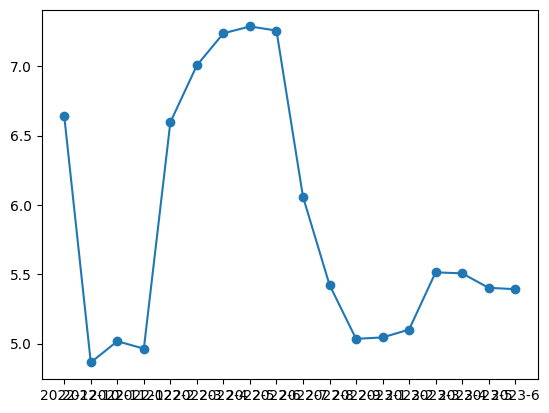

In [14]:
plt.plot(gas_statisct['DATA'], gas_statisct['mean'],marker="o" )


In [ ]:
mean = df.groupby(['REGIAO','ESTADO','PRODUTO','ANO','MES'])['VENDA'].mean()#.plot(kind='bar')
display(mean)

# dt1=df[['REGIÃO','ESTADO','PRODUTO','ANO','MÊS','NÚMERO DE POSTOS PESQUISADOS']].groupby(['REGIÃO','ESTADO','PRODUTO','ANO','MÊS']).sum()
# test.pivot_table(index=['REGIAO','ESTADO','PRODUTO'], columns=['ANO', 'MES'], values=['VENDA'])

REGIAO  ESTADO  PRODUTO  ANO   MES
CO      DF      DIESEL   2022  1      5.487805
                               2      5.598778
                               3      6.350000
                               4      6.858043
                               5      6.887387
                                        ...   
SE      SP      GNV      2023  2      5.074605
                               3      4.759609
                               4      4.562157
                               5      4.485344
                               6      4.314638
Name: VENDA, Length: 2753, dtype: float64